# Van der Pol equation

## Limiting cycle

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp

In [91]:
x0, x1, x2, k1, k2, eps = sp.symbols('x_0, x_1, x_2, k_1, k_2, \epsilon', real=True)
dx0, dx1, dx2 = sp.symbols('\dot{x}_0, \dot{x}_1, \dot{x}_2')
d2x0, d2x1, d2x2 = sp.symbols('\ddot{x}_0, \ddot{x}_1, \ddot{x}_2')
t = sp.symbols('t')

In [10]:
x = x0 + x1 * eps + x2 * eps**2
dx = dx0 + dx1 * eps + dx2 * eps**2
d2x = d2x0 + d2x1 * eps + d2x2 * eps**2
w = 1 + k1 * eps + k2 * eps**2

In [11]:
eq1 = w**2 * d2x - eps * (1-x**2)*dx + x

In [12]:
eq1

\epsilon**2*x_2 + \epsilon*x_1 - \epsilon*(1 - (\epsilon**2*x_2 + \epsilon*x_1 + x_0)**2)*(\dot{x}_0 + \dot{x}_1*\epsilon + \dot{x}_2*\epsilon**2) + x_0 + (\ddot{x}_0 + \ddot{x}_1*\epsilon + \ddot{x}_2*\epsilon**2)*(\epsilon**2*k_2 + \epsilon*k_1 + 1)**2

In [21]:
eq2 = eq1.expand().collect(eps)
eq2

\ddot{x}_0 + \dot{x}_2*\epsilon**7*x_2**2 + \epsilon**6*(\ddot{x}_2*k_2**2 + \dot{x}_1*x_2**2 + 2*\dot{x}_2*x_1*x_2) + \epsilon**5*(\ddot{x}_1*k_2**2 + 2*\ddot{x}_2*k_1*k_2 + \dot{x}_0*x_2**2 + 2*\dot{x}_1*x_1*x_2 + 2*\dot{x}_2*x_0*x_2 + \dot{x}_2*x_1**2) + \epsilon**4*(\ddot{x}_0*k_2**2 + 2*\ddot{x}_1*k_1*k_2 + \ddot{x}_2*k_1**2 + 2*\ddot{x}_2*k_2 + 2*\dot{x}_0*x_1*x_2 + 2*\dot{x}_1*x_0*x_2 + \dot{x}_1*x_1**2 + 2*\dot{x}_2*x_0*x_1) + \epsilon**3*(2*\ddot{x}_0*k_1*k_2 + \ddot{x}_1*k_1**2 + 2*\ddot{x}_1*k_2 + 2*\ddot{x}_2*k_1 + 2*\dot{x}_0*x_0*x_2 + \dot{x}_0*x_1**2 + 2*\dot{x}_1*x_0*x_1 + \dot{x}_2*x_0**2 - \dot{x}_2) + \epsilon**2*(\ddot{x}_0*k_1**2 + 2*\ddot{x}_0*k_2 + 2*\ddot{x}_1*k_1 + \ddot{x}_2 + 2*\dot{x}_0*x_0*x_1 + \dot{x}_1*x_0**2 - \dot{x}_1 + x_2) + \epsilon*(2*\ddot{x}_0*k_1 + \ddot{x}_1 + \dot{x}_0*x_0**2 - \dot{x}_0 + x_1) + x_0

In [18]:
eq2.subs(eps,0)

\ddot{x}_0 + x_0

In [19]:
eq2.diff(eps).subs(eps,0)

2*\ddot{x}_0*k_1 + \ddot{x}_1 + \dot{x}_0*x_0**2 - \dot{x}_0 + x_1

In [20]:
(eq2.diff(eps,2)/2).subs(eps,0)

\ddot{x}_0*k_1**2 + 2*\ddot{x}_0*k_2 + 2*\ddot{x}_1*k_1 + \ddot{x}_2 + 2*\dot{x}_0*x_0*x_1 + \dot{x}_1*x_0**2 - \dot{x}_1 + x_2

## Method of averaging

In [93]:
u, v, du, dv = sp.symbols('u, v, \dot{u}, \dot{v}')

In [96]:
 x =  u*sp.cos(t) + v*sp.sin(t)
dx = -u*sp.sin(t) + v*sp.cos(t)

In [97]:
F = (1-x**2)*dx

In [109]:
eq1=(sp.integrate((-sp.sin(t)*F).expand(),(t,0,2*sp.pi))/sp.pi).expand()
eq1

-u**3/4 - u*v**2/4 + u

In [110]:
eq2=(sp.integrate((sp.cos(t)*F).expand(),(t,0,2*sp.pi))/sp.pi).expand()
eq2

-u**2*v/4 - v**3/4 + v

In [112]:
z1, z2 = sp.symbols('z_1, z_2')

In [117]:
eq3 = eq1.subs([(u,z1+sp.I*z2),(v,z1-sp.I*z2)])
eq4 = eq2.subs([(u,z1+sp.I*z2),(v,z1-sp.I*z2)])

In [119]:
(eq3+sp.I*eq4).expand()

-z_1**3/2 - I*z_1**3/2 - z_1**2*z_2/2 - I*z_1**2*z_2/2 + z_1*z_2**2/2 + I*z_1*z_2**2/2 + z_1 + I*z_1 + z_2**3/2 + I*z_2**3/2 + z_2 + I*z_2

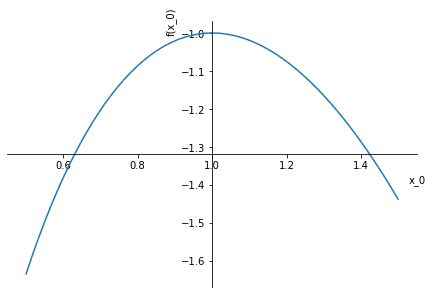

In [90]:
sp.plot(sp.log(x0**2)-x0**2, (x0,0.5,1.5))

## Numerical solution

In [22]:
# for numerical integration
def vdp(z, t, e):
    return [ z[1], -z[0] + e*(1-z[0]**2)*z[1] ]

In [77]:
def plot_solution(t, sol):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(t, sol[:,0])
    plt.xlabel('$t$')
    plt.ylabel('$x$')
    plt.subplot(1,2,2)
    plt.plot(sol[:,0], sol[:,1])
    plt.xlabel('$x$')
    plt.ylabel('$\dot{x}$')
    plt.grid(True)
    plt.show()

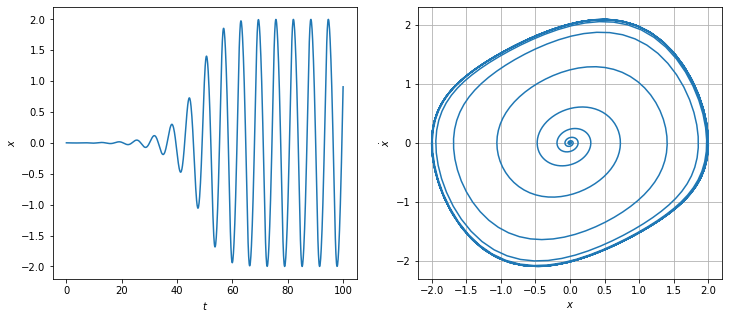

In [78]:
t = np.linspace(0, 100, 1000)
sol = odeint(vdp, [1e-3, 0], t, args=(0.3,))
plot_solution(t, sol)

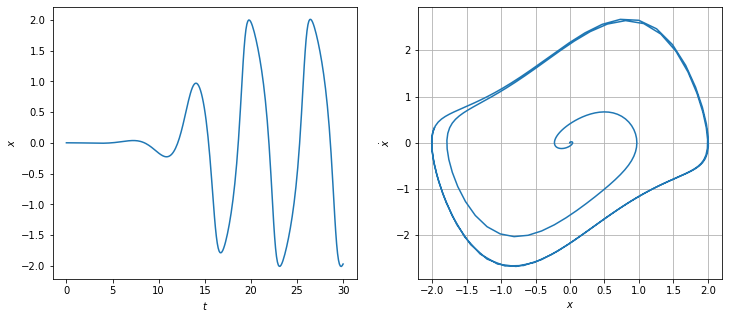

In [79]:
t = np.linspace(0, 30, 300)
sol = odeint(vdp, [1e-3, 0], t, args=(1,))
plot_solution(t, sol)

Relaxation oscillations similar to multivibrator at $\epsilon \gg 1$.

Period depends on $\epsilon$.

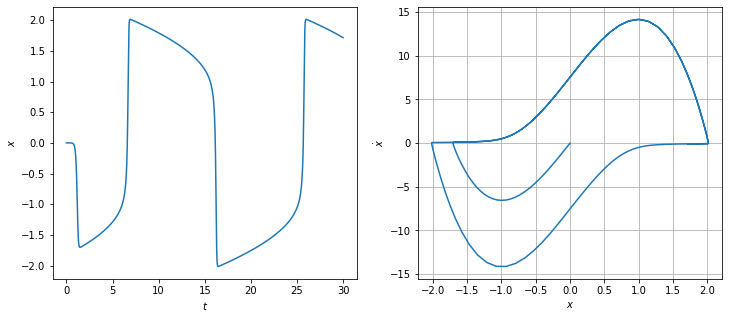

In [80]:
t = np.linspace(0, 30, 3000)
sol = odeint(vdp, [1e-3, 0], t, args=(10,))
plot_solution(t, sol)

## Notes

"Dynamics of a System Exhibiting the Global Bifurcation of a Limit Cycle at Infinity" by W.L.Keith and R.H.Rand, Int. J. Non-Linear Mechanics, 20:325-338 (1985)